Logistic: f1=0.841 auc=0.898


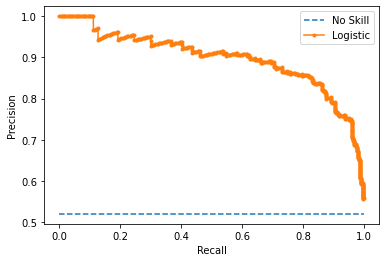

In [17]:

# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
import numpy as np
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [18]:
len(testy)

500

In [22]:
lr_precision, lr_recall, _ = precision_recall_curve(np.zeros(500), lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

C:\Users\Marc\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [25]:
lr_f1

0.8413001912045889

In [28]:
f1_score(testy, yhat)

0.8413001912045889

In [ ]:
import csv
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..") # adds higher directory to python modules path

from LoaderPACK.Loader import testload_5min
from LoaderPACK.Accuarcy_finder import Accuarcy_find_tester
import torch
import matplotlib.pyplot as plt

device = "cpu"

if device == "cpu":
    fl = torch.FloatTensor
    it = torch.LongTensor
else:
    fl = torch.cuda.FloatTensor
    it = torch.cuda.LongTensor

    # "C:/Users/Marc/Desktop/data/val_model_data"
    # "C:/Users/Marc/Desktop/data/train_model_data"

load_file = testload_5min(path = "C:/Users/Marc/Desktop/data/val_model_data",
                          series_dict = 'val_series_length.pickle',
                          size = (28, 22, 549200), #size = (195, 22, 2060000),
                          device = device) # total val series = 2642
                                           # total train series = 18497

loader = torch.utils.data.DataLoader(load_file,
                                     batch_size=1,
                                     shuffle=False,
                                     num_workers=0)

it = iter(loader)

ind, tar, meta = next(it)

target = torch.zeros(1)

while target.sum() == 0:

    data = (ind.view(-1).abs()/200)
    data = data.view(-1,1).numpy()

    target = np.int32(tar.view(-1, 1).numpy())